In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Simulate straight line and circular movements with Unicycle model

Robot is at the origin (0, 0) and facing North, i.e, $\theta = \pi/2$

Use the Kinematics equations we had developed in last for the Unicycle model

In [ ]:
def unicycle_model(curr_pose, v, w, dt=1.0):
    ## write code to calculate next_pose
    # refer to the kinematic equations of a unicycle model
    x = curr_pose[0] + v*np.cos(curr_pose[2])*dt
    y = curr_pose[1] + v*np.sin(curr_pose[2])*dt
    theta = curr_pose[2] + w*dt
    
    # Keep theta bounded between [-pi, pi]
    theta = np.arctan2(np.sin(theta), np.cos(theta))
    # return calculated (x, y, theta)
    return (x, y, theta)

### Task
Simulate motion along a straight line and circle

Look at the kinematics equations you wrote - what should $v,\omega$ if
+ There is no change in $\theta$
+ $\theta$ has to change from 0 to 360 degrees

In [ ]:
#straight line
straight_trajectory = []
pose = (0, 0, np.pi/2)
steps = 10 #number of time-steps for simulation
#fill in scalar v and omega values
v = [1]*steps
w = [0]*steps

for i in range(steps):
   #instruction to take v, w and compute new pose 
   v1 = v[i]
   w1 = w[i]
   straight_trajectory.append(pose)   #append pose to straight_trajectory
   pose =  unicycle_model(pose,v1,w1) #update_pose using unicycle_model()
   
straight_trajectory = np.array(straight_trajectory)
    

In [ ]:
#circle
circle_trajectory = []
pose = (0, 0, np.pi/2)
steps = 1000
#fill in v and omega values 
w = [1]*steps
v = [1]*steps
for j in range(steps):
    #instruction to take v, w and compute new pose 
    v2 = v[j]
    w2 = w[j]
    circle_trajectory.append(pose)      
    new_pose = unicycle_model(pose, v2, w2,1)
    # store new pose
    pose = new_pose
circle_trajectory = np.array(circle_trajectory)

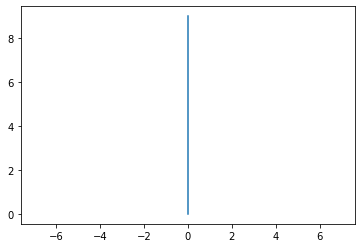

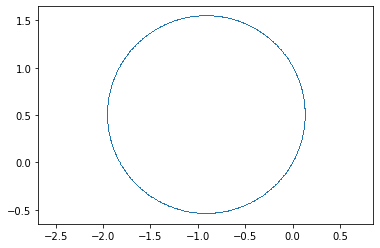

In [ ]:
### Plot straight and circular trajectories
plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(straight_trajectory[:,0],straight_trajectory[:,1])

plt.figure()
plt.axes().set_aspect("equal","datalim")
plt.plot(circle_trajectory[:,0],circle_trajectory[:,1],',')



### Simulate Unicycle model with Open Loop control

We want the robot to follow these instructions

**straight 10m, right turn, straight 5m, left turn, straight 8m, right turn**

It is in open loop; control commands have to be calculated upfront. How do we do it?

To keep things simple in the first iteration, we can fix $v = v_c$ and change only $\omega$. To make it even simpler, $\omega$ can take only 2 values 
+ 0 when the vehicle is going straight 
+ $\omega = \omega_c$ when turning

This leaves only 2 questions to be answered
* What should be $v_c$ and $\omega_c$?
* When should $\omega$ change from 0 and back?

In [ ]:
vc = 1 #m/s
wc = np.pi/6 #rad/s

#calculate time taken to finish a quarter turn (pi/2)
t_turn = int(np.pi/2/wc)

#calculate the time taken to finish straight segments
# omega array is to be padded with equivalent zeros

t_straight1, t_straight2, t_straight3 = int(10/vc), int(5/vc), int(8/ vc)

all_w = [0]*t_straight1 + [wc]*t_turn + \
        [0]*t_straight2 + [wc]*t_turn + \
        [0]*t_straight3 + [-wc]*t_turn

all_v = vc*np.ones_like(all_w)

Let us make a cool function out of this!

Take in as input a generic route and convert it into open-loop commands

Input format: [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]

Output: all_v, all_w

In [ ]:
def get_open_loop_commands(route,vc=1,wc=np.pi/12,dt=1.0):
  all_w = []
  w_values = {'straight': 0.0, 'left': wc, 'right': -wc}
  for maneouvre, distance in route:
    if(maneouvre == 'straight'):
      t = int(distance/vc) #write your code
      all_w.extend([w_values[maneouvre]] * t)
    else:
      t = int((np.pi/180)*distance/wc) #write your code
      all_w.extend([w_values[maneouvre]] * t) 
  all_v = vc * np.ones_like(all_w)
  print("all_w:",all_w)
  print("all_v:",all_v)
  return all_v, all_w

### Unit test your function with the following inputs

+ [("straight", 5), ("right", 90), ("straight", 6), ("left", 85)]
+ $v_c = 1$
+ $w_c = \pi/12$

In [ ]:
all_v, all_w = get_open_loop_commands([("straight", 5), ("right", 90), ("straight", 6), ("left", 85)])

all_w: [0.0, 0.0, 0.0, 0.0, 0.0, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494]
all_v: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
robot_trajectory = []
all_v, all_w = get_open_loop_commands([("straight", 5), ("right", 90), ("straight", 6), ("left", 85)])
pose = (0, 0, np.pi/2)
curr_pose = (0,0,np.pi/2)
robot_trajectory.append(curr_pose)
for v, w in zip(all_v, all_w):
    # store new pose
    curr_pose = unicycle_model(curr_pose,v,w) #complete function call
    #instruction to take v, w and compute new pose    
    robot_trajectory.append(curr_pose)
   

all_w: [0.0, 0.0, 0.0, 0.0, 0.0, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494]
all_v: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


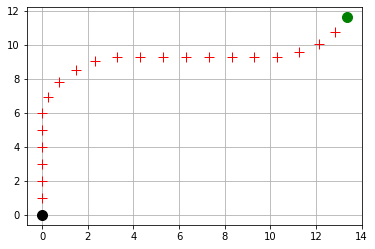

In [ ]:
# plot robot trajectory
plt.figure()
plt.grid()
#plt.plot( )

#show first and last robot positions with + markers
xi, yi, _ = robot_trajectory[0]
xf, yf, _ = robot_trajectory[-1]
plt.plot(xi, yi, 'ko', ms=10)
plt.plot(xf, yf, 'go', ms=10)

for x,y,_ in robot_trajectory[1:-1]:
  plt.plot(x,y,'r+', ms=10)



### Improved capabilities!

+ Slow the robot while turning ($v_c$ for turn and straight needed)

+ How to accommodate a sampling time < 1.0s (hint: think of sampling instances instead of time)

In [ ]:
def get_open_loop_commands_with_variable_velocity(route,vc_straight=1,velocity_reduction_factor=2,wc=np.pi/12,dt=1.0):
  all_w = []
  all_v = []
  w_values = {'straight': 0.0, 'left': wc, 'right': -wc}
  for maneouvre, distance in route:
    if(maneouvre == 'straight'):
      t = int(distance/vc) #write your code
      #all_w.extend([w_values[maneouvre]] * t)
      all_w.extend([w_values[maneouvre]] * int(t/dt))
      #all_v.extend([vc]*t)
      all_v.extend([vc]*int(t/dt))
    else:
      t = int((np.pi/180)*distance/wc) #write your code
      #all_w.extend([w_values[maneouvre]] * t)
      all_w.extend([w_values[maneouvre]] * int(t/dt)) 
      #all_v.extend([vc/velocity_reduction_factor]*t)
      all_v.extend([vc/velocity_reduction_factor]*int(t/dt))
  print("all_w:",all_w)
  print("all_v:",all_v)
  return all_v, all_w

In [ ]:
robot_trajectory = []
all_v, all_w = get_open_loop_commands_with_variable_velocity([("straight", 5), ("right", 90), ("straight", 6), ("left", 85)],dt = 0.5)
pose = (0, 0, np.pi/2)
curr_pose = (0,0,np.pi/2)
robot_trajectory.append(curr_pose)
for v, w in zip(all_v, all_w):
    # store new pose
    curr_pose = unicycle_model(curr_pose,v,w,dt=0.5) #complete function call
    #instruction to take v, w and compute new pose    
    robot_trajectory.append(curr_pose)

all_w: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, -0.2617993877991494, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494, 0.2617993877991494]
all_v: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]


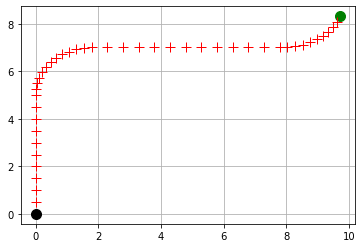

In [ ]:
# plot robot trajectory
plt.figure()
plt.grid()
#plt.plot( )

#show first and last robot positions with + markers
xi, yi, _ = robot_trajectory[0]
xf, yf, _ = robot_trajectory[-1]
plt.plot(xi, yi, 'ko', ms=10)
plt.plot(xf, yf, 'go', ms=10)

for x,y,_ in robot_trajectory[1:-1]:
  plt.plot(x,y,'r+', ms=10)